Comparing Plano's population to Plano presidential election voting behaviors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [39]:
# Manipulate population data to just 2000-2020 and make the years the indices
def cleanPlanoPopulationData():
    plano_population_df = pd.read_csv('plano-population-data.csv')
    plano_population_df = plano_population_df[14:]
    plano_population_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    plano_population_df.set_index('Historical population', inplace = True)
    plano_population_df = plano_population_df.rename(columns={'Unnamed: 1': 'Population'})
    plano_population_df.drop('Unnamed: 2', axis=1, inplace=True)
    plano_population_df.drop('Unnamed: 3', axis=1, inplace=True)
    plano_population_df=plano_population_df.astype(float)

    return plano_population_df

In [40]:
clean_population_data = cleanPlanoPopulationData()

In [41]:
# Manipulate presidential data to just 2000, 2010, 2020 and make the years the indices
def cleanPresidentialPopulationData():
    plano_presidential_df = pd.read_csv('plano-presidential-data.csv')
    plano_presidential_df.iloc[::-1]
    plano_presidential_df.set_index('Year', inplace = True)
    plano_presidential_df=plano_presidential_df.astype(float)
    return plano_presidential_df


In [42]:
clean_presidential_data = cleanPresidentialPopulationData()

In [43]:
 def plot_population_and_presidential_data(population_data, presidential_data):
    ax = presidential_data.plot()
    population_data.plot(ax=ax)

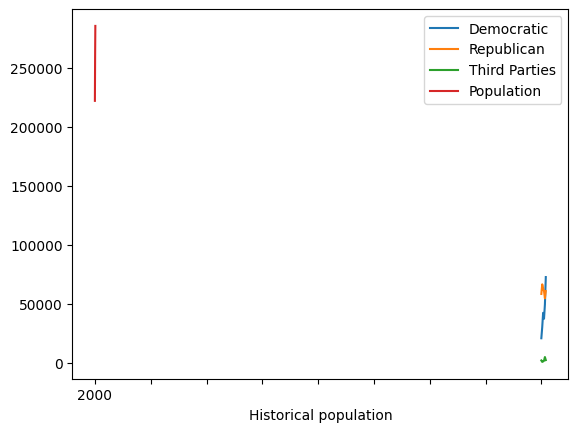

In [44]:
plot_population_and_presidential_data(clean_population_data, clean_presidential_data)

In [45]:
# Okay, this is clearly incorrect. Figure this out tomorrow. 